# HW 10-1 RNN
---
(慣例的基本套件載入與資料讀取)

In [1]:
%env KERAS_BACKEND=tensorflow
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import imdb

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

print('訓練總筆數:', len(x_train))
print('測試總筆數:', len(x_test))

env: KERAS_BACKEND=tensorflow
訓練總筆數: 25000
測試總筆數: 25000


In [2]:
from keras.preprocessing import sequence
x_train = sequence.pad_sequences(x_train, maxlen=150)
x_test = sequence.pad_sequences(x_test, maxlen=150)
x_train.shape

(25000, 150)

In [3]:
from keras.utils import plot_model
from keras.models import Model, Sequential
from keras.layers import Dense, Embedding, Input
from keras.layers import LSTM
from keras.layers import concatenate, add
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

以上都跟上課一樣，先用 Functional API 改寫上課的模型：

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 150, 3)            30000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 4)                 128       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 30,133
Trainable params: 30,133
Non-trainable params: 0
_________________________________________________________________


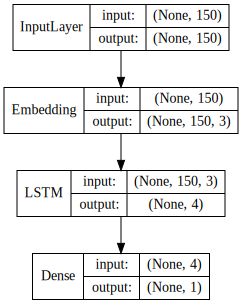

In [4]:
N = 3
K = 4
vis = Input(shape=(150,))
l1 = Embedding(10000, N)(vis)
l2 = LSTM(K)(l1)
opt = Dense(1, activation='sigmoid')(l2)

model = Model(inputs=vis, outputs=opt)
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

model.summary()
SVG(model_to_dot(model, show_shapes=True,
                 show_layer_names=False).create(prog='dot', format='svg'))

In [5]:
model.fit(x_train, y_train, batch_size=32, epochs=5)
score = model.evaluate(x_test, y_test)
print(f'測試資料的 loss = {score[0]}')
print(f'測試資正確率 = {score[1]}')

Epoch 1/5
25000/25000 [==============================] - 57s 2ms/step - loss: 0.5067 - acc: 0.7539
Epoch 2/5
25000/25000 [==============================] - 59s 2ms/step - loss: 0.2984 - acc: 0.8867
Epoch 3/5
25000/25000 [==============================] - 59s 2ms/step - loss: 0.2334 - acc: 0.9154
Epoch 4/5
25000/25000 [==============================] - 58s 2ms/step - loss: 0.1978 - acc: 0.9317
Epoch 5/5
25000/25000 [==============================] - 8s 310us/step
測試資料的 loss = 0.38704827177524564
測試資正確率 = 0.85408


## 改良模型

沒啥靈感，先參考很多人做的 Dropout 後，隨便試試各種參數，發現 N 跟 K 在 100 以上表現沒有顯著差異，於是從小抓起：

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 150)               0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 150, 16)           160000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 150, 16)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 9)                 936       
_________________________________________________________________
dropout_4 (Dropout)          (None, 9)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 10        
Total params: 160,946
Trainable params: 160,946
Non-trainable params: 0
_________________________________________________________________


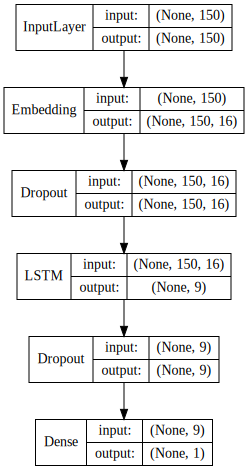

In [8]:
from keras.layers import Dropout
N = 16
K = 9
vis = Input(shape=(150,))
l1 = Embedding(10000, N)(vis)
do1 = Dropout(0.75)(l1)
l2 = LSTM(K)(do1)
do2 = Dropout(0.25)(l2)
opt = Dense(1, activation='sigmoid')(do2)

model2 = Model(inputs=vis, outputs=opt)
model2.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

model2.summary()
SVG(model_to_dot(model2, show_shapes=True,
                 show_layer_names=False).create(prog='dot', format='svg'))

In [9]:
model2.fit(x_train, y_train, batch_size=32, epochs=5)
score2 = model2.evaluate(x_test, y_test)
print(f'測試資料的 loss = {score2[0]}')
print(f'測試資正確率 = {score2[1]}')

Epoch 1/5
25000/25000 [==============================] - 61s 2ms/step - loss: 0.5310 - acc: 0.7215
Epoch 2/5
25000/25000 [==============================] - 65s 3ms/step - loss: 0.3406 - acc: 0.8622
Epoch 3/5
25000/25000 [==============================] - 64s 3ms/step - loss: 0.2950 - acc: 0.8834
Epoch 4/5
25000/25000 [==============================] - 61s 2ms/step - loss: 0.2654 - acc: 0.8970
Epoch 5/5
25000/25000 [==============================] - 8s 312us/step
測試資料的 loss = 0.30838092806816103
測試資正確率 = 0.87124


勉強達標